### Case Study: COVID-19 Evolution in Mexico City & Correlation with Proximity Retailing Activity

##### 0.0 - Section Description

insert description!!!

##### 0.1 - Libraries, API keys, Configuration & Data Loading



In [107]:
#Libraries
import pandas as pd
import numpy as np
import geopandas as gpd #GIS dependency for spatial data manipulation
from datetime import datetime
import matplotlib.pyplot as plt
import requests

#API keys
from api_keys import gkey

#Data
covid = pd.read_csv("Resources/covid_19_por_colonia_y_fecha.csv") #Covid cases by neighbourghood (Mexico City)
colonias = gpd.read_file("Resources/coloniascdmx/coloniascdmx.shp") #Shapefile w/ Mexico City neighbourhoods

##### 1.1 Descriptive Data Analysis

In [154]:
#Basic exploration of Covid df
#The df contains observations of active covid-19 cases by Mexico City Neighbourhood since the beginning of the Pandemic.
covid = covid.rename(columns= {"Clave" : "cve_alc"})
len(covid) #over 84,000 observations
len(covid["cve_alc"].unique()) #1496 unique neighbourhoods
len(covid["Fecha"].unique()) #184 days reported
184*1496 #Not entries for all neighbourhoods at all days (otherwise we should have a 275,000 row df)
covid.head()

,cve_alc,Fecha,Casos positivos
0,05-011,200630,6
1,05-011,200903,8
2,05-011,200904,8
3,05-011,200905,7
4,05-011,200906,7


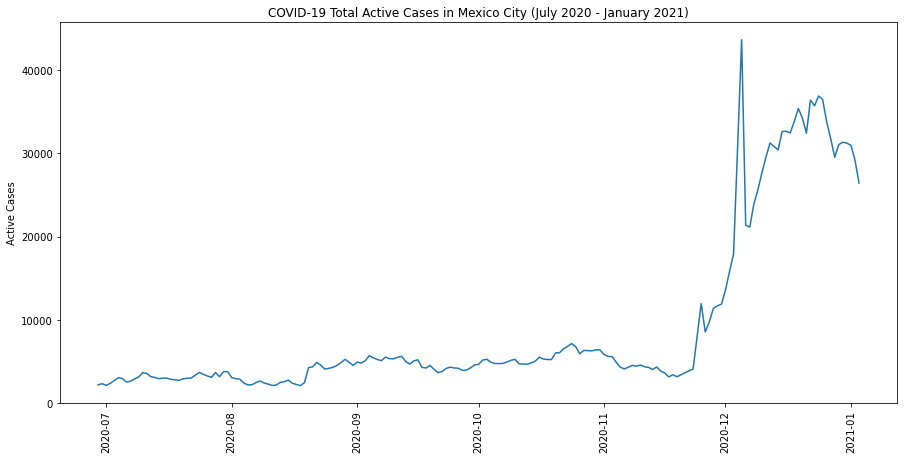

In [152]:
#Evolution of total active cases in Mexico City over time.

#group total cases by date
covid_grouped = pd.DataFrame({"Total Cases" : covid.groupby("Fecha")["Casos positivos"].sum()}).reset_index()
covid_grouped["Fecha"] = pd.to_datetime(covid_grouped["Fecha"], format= "%y%m%d")

#plotting
plt.figure(figsize= [15,7])
plt.plot(covid_grouped["Fecha"], covid_grouped["Total Cases"])
plt.title("COVID-19 Total Active Cases in Mexico City (July 2020 - January 2021)")
plt.ylabel("Active Cases")
plt.xticks(rotation='vertical')
plt.show()

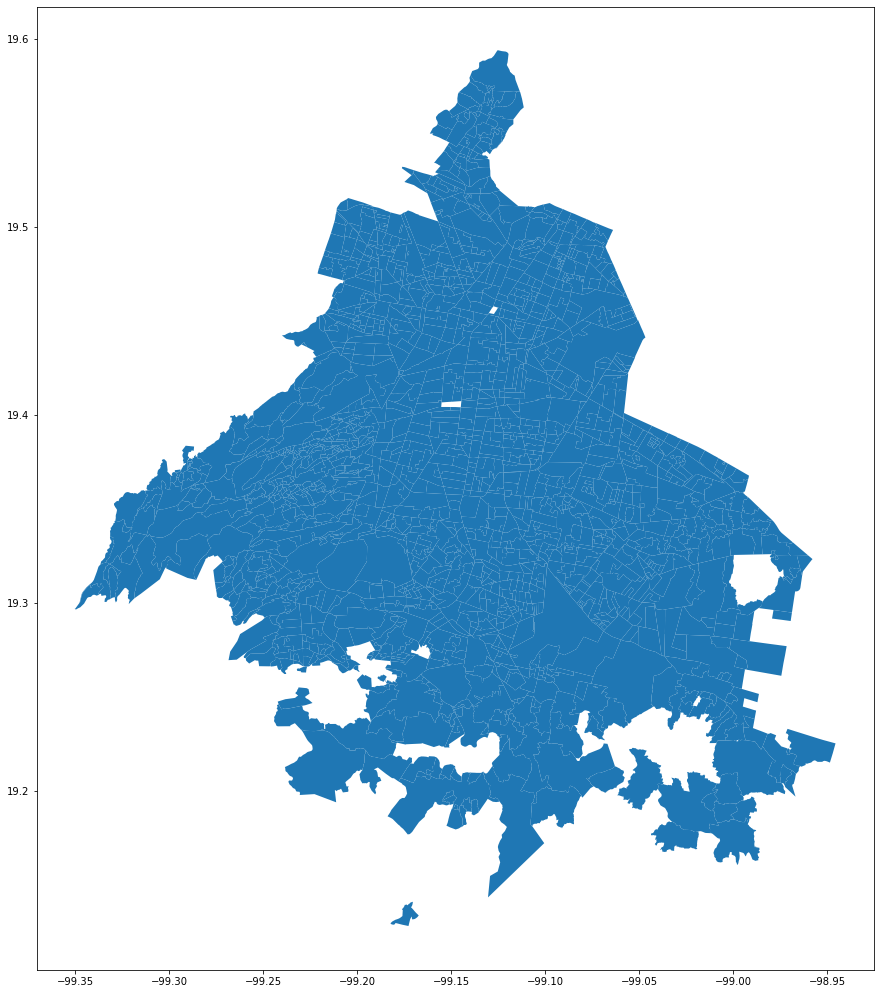

In [155]:
colonias.plot(figsize= [15,20])
plt.show()